# Data Augmentation Libraries

## 2 de las principales bibliotecas que nos ayudan con augmentation para imágenes

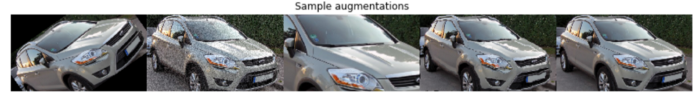

> Image Augmentation creates a rich, diverse set of images from a small set of images for image classification, object detection or image segmentation.

In [ ]:
pip install imgaug

## IMGAUG

In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

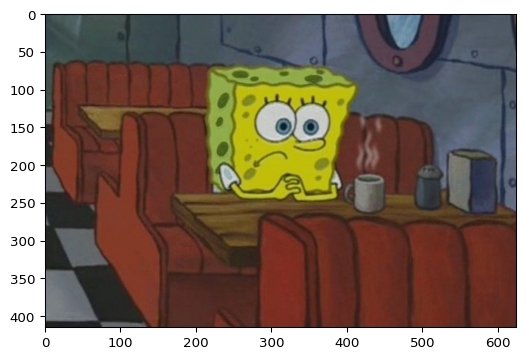

In [ ]:
image = imageio.imread("https://arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/AUZ4PJV7BFFHLME4ZZZCY3NE3U.jpg")
ia.imshow(image)

### Rotando la imagen

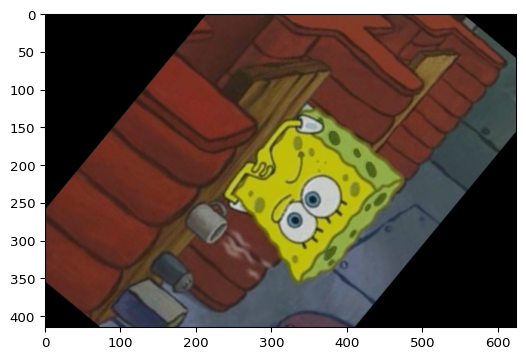

In [ ]:
rotate=iaa.Affine(rotate=(-1000, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)

### Agregando ruido

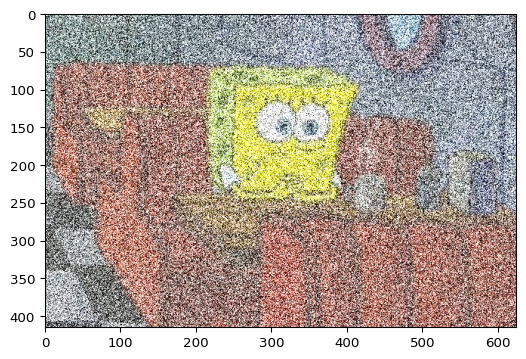

In [ ]:
gaussian_noise=iaa.AdditiveGaussianNoise(80,100)
noise_image=gaussian_noise.augment_image(image)
ia.imshow(noise_image)

### Cortando la imagen

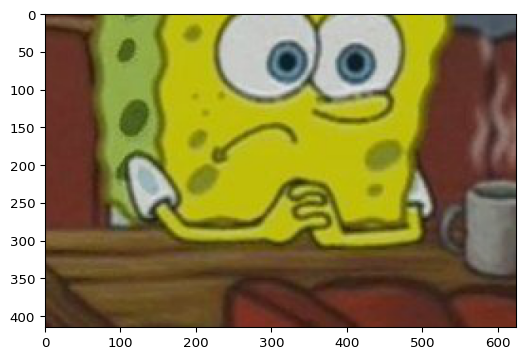

In [ ]:
crop = iaa.Crop(percent=(0.3, 0.3)) # crop image
corp_image=crop.augment_image(image)
ia.imshow(corp_image)

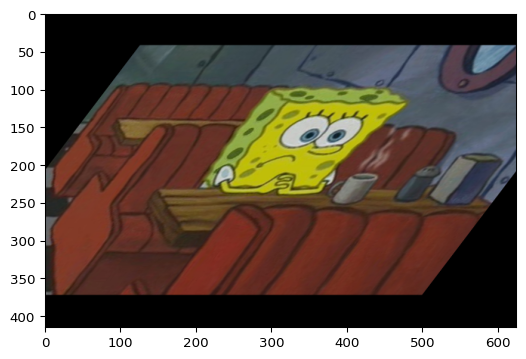

In [ ]:
shear = iaa.Affine(shear=(0,40))
shear_image=shear.augment_image(image)
ia.imshow(shear_image)

### Volteando la imagen

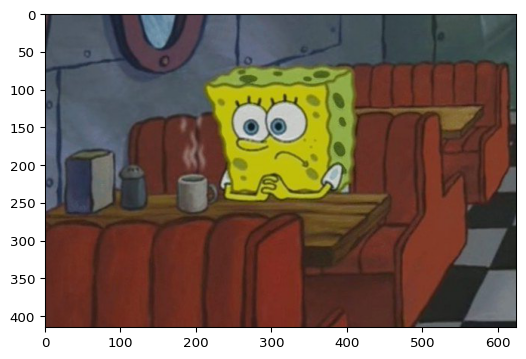

In [ ]:
#flipping image horizontally
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(image)
ia.imshow(flip_hr_image)

### Poniendo la imagen de cabeza

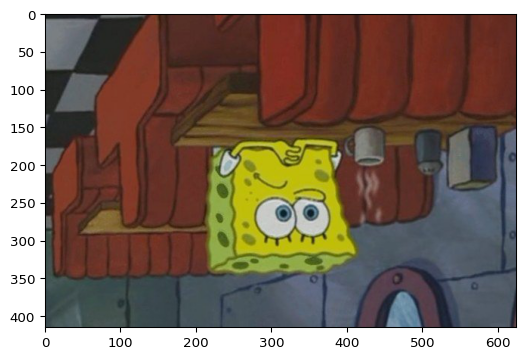

In [ ]:
flip_vr=iaa.Flipud(p=1.0)
flip_vr_image= flip_vr.augment_image(image)
ia.imshow(flip_vr_image)

### Cambiando el brillo

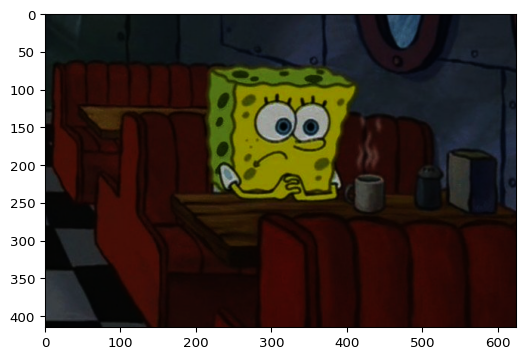

In [ ]:
image = imageio.imread("https://arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/AUZ4PJV7BFFHLME4ZZZCY3NE3U.jpg")
contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

### Reescalando la Imagen

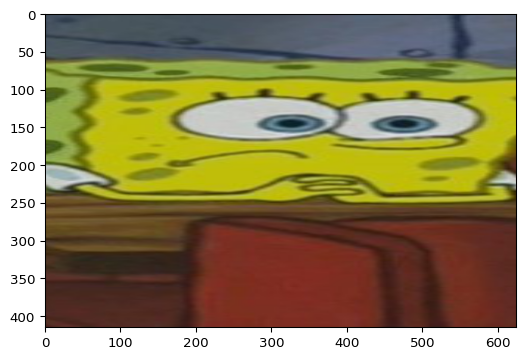

In [ ]:
image = imageio.imread("https://arc-anglerfish-arc2-prod-copesa.s3.amazonaws.com/public/AUZ4PJV7BFFHLME4ZZZCY3NE3U.jpg")
scale_im=iaa.Affine(scale={"x": (4.5, 2.0), "y": (1.5, 1.0)})
scale_image =scale_im.augment_image(image)
ia.imshow(scale_image)

### Detección de Objetos

In [ ]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [ ]:
bbs = BoundingBoxesOnImage([
 BoundingBox(x1=410, x2=710, y1=20, y2=100)
], shape=image.shape)

#### Delimitando la imagen

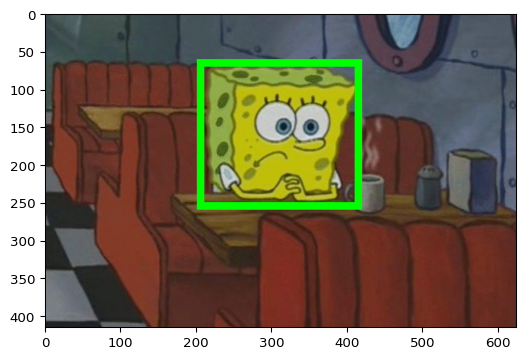

In [ ]:
ia.imshow(bbs.draw_on_image(image, size=10))

Ahora movamos la imagen usando "translate_percentage", aumentamos el cuadro delimitador y lo aplicamos sobre la imagen.

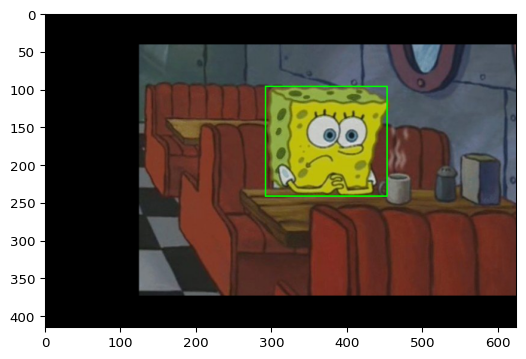

In [ ]:
move=iaa.Affine(translate_percent={"x": 0.1}, scale=0.8)
image_aug, bbs_aug = move(image=image, bounding_boxes=bbs)
ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))

#### Manejo de cuadros delimitadores fuera de la imagen después de aplicar el aumento de imagen

##### El cuadro delimitador puede salir en algún momento de la imagen y necesitamos código adicional para manejar tal escenario Rotamos la imagen e intentamos dibujar el cuadro delimitador alrededor del objeto.

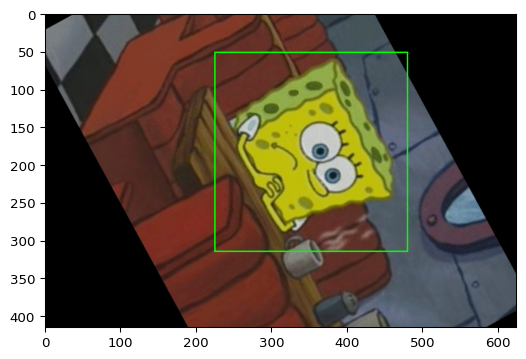

In [ ]:
rotate_bb=iaa.Affine(rotate=(-200, 750))
image_aug, bbs_aug = rotate_bb(image=image, bounding_boxes=bbs)
ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))


In [ ]:
def pad(image, by):
    image_border1 = ia.pad(image, top=1, right=1, bottom=1, left=1,
                           mode="constant", cval=255)
    image_border2 = ia.pad(image_border1, top=by-1, right=by-1,
                           bottom=by-1, left=by-1,
                           mode="constant", cval=0)
    return image_border2

In [ ]:
def draw_bbs(image, bbs, border):
  GREEN = [0, 255, 0]
  ORANGE = [255, 140, 0]
  RED = [255, 0, 0]
  image_border = pad(image, border)
  for bb in bbs.bounding_boxes:
      if bb.is_fully_within_image(image.shape):
          color = GREEN
      elif bb.is_partly_within_image(image.shape):
          color = ORANGE
      else:
          color = RED
      image_border = bb.shift(left=border, top=border)\
                       .draw_on_image(image_border, size=2, color=color)
  return image_border

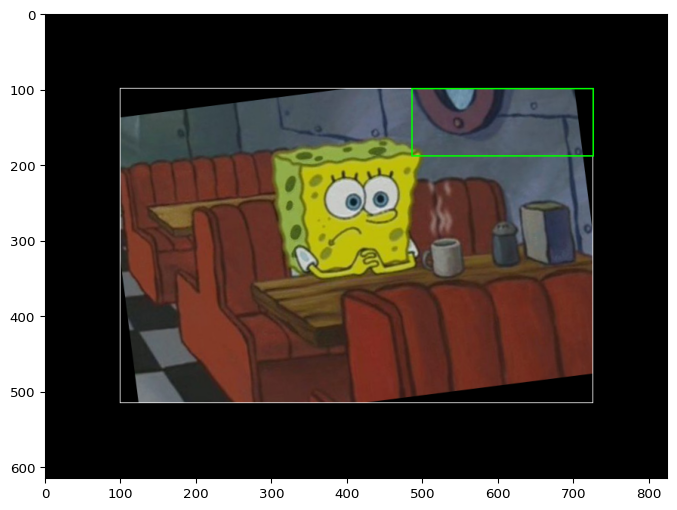

In [ ]:
rotate=iaa.Affine(rotate=(-50, 30))
image_aug, bbs_aug = rotate(image=image, bounding_boxes=bbs)
image_after = draw_bbs(image_aug, bbs_aug.remove_out_of_image().clip_out_of_image(), 100)
ia.imshow(image_after)

## AUGMENTOR

[Github Docs](https://github.com/mdbloice/Augmentor)

In [ ]:
!pip install Augmentor

In [30]:
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline("canadatower")
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.flip_top_bottom(probability=0.5)
p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
p.resize(probability=1.0, width=120, height=120)
p.sample(7)

Initialised with 1 image(s) found.
Output directory set to canadatower/output.

Processing <PIL.Image.Image image mode=RGB size=120x120 at 0x7F0388A1D590>: 100%|██████████| 7/7 [00:01<00:00,  3.86 Samples/s]
